In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# 1. Read the data
data = pd.read_csv("Stores1b.csv")

In [3]:
# 2. Calculate the % of missing values in the columns
missing_percentage = data.isnull().mean() * 100
print("% of missing values in each column:")
print(missing_percentage)

% of missing values in each column:
Branch            7.843137
City              0.000000
Customer          0.000000
Gender            0.000000
Product line     35.294118
Unit_price        0.000000
Quantity          0.000000
Tax               0.000000
Total             0.000000
Payment           0.000000
cogs              0.000000
Rating            0.000000
Age               0.000000
Quarterly_Tax     7.843137
Price             0.000000
dtype: float64


In [5]:
# 3. Replace missing value with mean for numerical columns if % of missing value is < 10%
temp_data1 = data.copy(deep=True)
for col in temp_data1.select_dtypes(include=['number']).columns:
    if missing_percentage[col] < 10:
        temp_data1[col] = temp_data1[col].fillna(temp_data1[col].mean())
print("\nMissing values replaced with mean for numerical columns.")


Missing values replaced with mean for numerical columns.


In [7]:
# 4. Perform interpolation using nearest method for numerical columns if % of missing value is < 10%
temp_data2 = data.copy(deep=True)
for col in temp_data2.select_dtypes(include=['number']).columns:
    if missing_percentage[col] < 10:
        temp_data2[col] = temp_data2[col].interpolate(method='nearest')
print("\nMissing values interpolated using nearest method for numerical columns.")


Missing values interpolated using nearest method for numerical columns.


In [9]:
# 5. Perform mode imputation for categorical data if % of missing value is < 10%
temp_data3 = data.copy(deep=True)
for col in temp_data3.select_dtypes(include=['object']).columns:
    if missing_percentage[col] < 10:
        temp_data3[col] = temp_data3[col].fillna(temp_data3[col].mode()[0])
print("\nMissing values replaced with mode for categorical columns.")


Missing values replaced with mode for categorical columns.


In [10]:
# 6. Drop columns with more than 10% missing values and display size
temp_data4 = data.copy(deep=True)
temp_data4.drop(columns=missing_percentage[missing_percentage > 10].index, inplace=True)
print("\nSize after dropping columns with >10% missing values:", temp_data4.shape)


Size after dropping columns with >10% missing values: (51, 14)


In [11]:
# 7. Drop rows with outlier Z-score value > 3 for "Quantity" and display size
temp_data5 = data.copy(deep=True)
z_scores_quantity = zscore(temp_data5['Quantity'].dropna())
outliers_quantity = np.abs(z_scores_quantity) > 3
temp_data5 = temp_data5[~outliers_quantity]
print("\nSize after dropping rows with Z-score > 3 for 'Quantity':", temp_data5.shape)


Size after dropping rows with Z-score > 3 for 'Quantity': (47, 15)


In [12]:
# 8. Find the % of duplicate rows with all columns having the same value
duplicate_rows_all = data.duplicated().mean() * 100
print("\n% of duplicate rows (all columns):", duplicate_rows_all)


% of duplicate rows (all columns): 3.9215686274509802


In [13]:
# 9. Find the % of duplicate rows based on specific columns and drop them
temp_data6 = data.copy(deep=True)
duplicate_rows_specific = temp_data6.duplicated(subset=['Customer', 'Product line', 'Age', 'Gender']).mean() * 100
print("\n% of duplicate rows (specific columns):", duplicate_rows_specific)
temp_data6.drop_duplicates(subset=['Customer', 'Product line', 'Age', 'Gender'], inplace=True)
print("Size after dropping duplicates (specific columns):", temp_data6.shape)


% of duplicate rows (specific columns): 15.686274509803921
Size after dropping duplicates (specific columns): (43, 15)


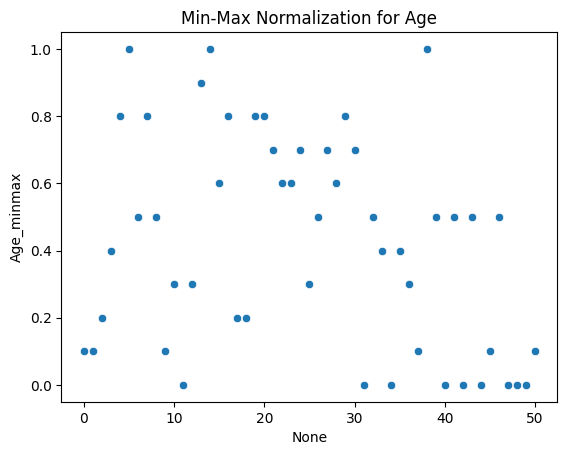

In [14]:
# 10. Perform min-max normalization for 'Age' and analyze with scatter plot
temp_data7 = data.copy(deep=True)
min_age = temp_data7['Age'].min()
max_age = temp_data7['Age'].max()
temp_data7['Age_minmax'] = (temp_data7['Age'] - min_age) / (max_age - min_age)
sns.scatterplot(x=temp_data7.index, y=temp_data7['Age_minmax'])
plt.title("Min-Max Normalization for Age")
plt.show()

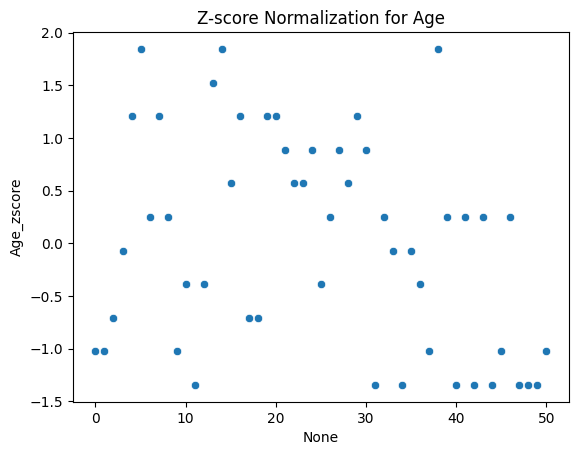

In [15]:
# 11. Perform Z-score normalization for 'Age' and analyze with scatter plot
temp_data8 = data.copy(deep=True)
temp_data8['Age_zscore'] = zscore(temp_data8['Age'].dropna())
sns.scatterplot(x=temp_data8.index, y=temp_data8['Age_zscore'])
plt.title("Z-score Normalization for Age")
plt.show()


In [16]:
# 12. Perform label encoding for 'Payment'
temp_data9 = data.copy(deep=True)
temp_data9['Payment_label'] = temp_data9['Payment'].astype('category').cat.codes
print("\nLabel encoding for 'Payment':")
print(temp_data9[['Payment', 'Payment_label']].head())


Label encoding for 'Payment':
       Payment  Payment_label
0      Ewallet              2
1         Cash              0
2  Credit card              1
3      Ewallet              2
4      Ewallet              2


In [17]:
# 13. Perform one-hot encoding for 'Payment'
temp_data10 = data.copy(deep=True)
payment_one_hot = pd.get_dummies(temp_data10['Payment'], prefix='Payment')
temp_data10 = pd.concat([temp_data10, payment_one_hot], axis=1)
print("\nOne-hot encoding for 'Payment':")
print(temp_data10.head())


One-hot encoding for 'Payment':
  Branch       City Customer  Gender            Product line  Unit_price  \
0      A     Yangon   Member  Female       Health and beauty       74.69   
1      C  Naypyitaw   Normal  Female  Electronic accessories       15.28   
2      A     Yangon   Normal    Male      Home and lifestyle       46.33   
3      A     Yangon   Member    Male       Health and beauty       58.22   
4      A     Yangon   Normal    Male       Sports and travel       86.31   

   Quantity      Tax     Total      Payment    cogs  Rating  Age  \
0         7  26.1415  548.9715      Ewallet  522.83     9.1   23   
1         5   3.8200   80.2200         Cash   76.40     9.6   23   
2         7  16.2155  340.5255  Credit card  324.31     7.4   24   
3         8  23.2880  489.0480      Ewallet  465.76     8.4   26   
4        60  30.2085  634.3785      Ewallet  604.17     5.3   30   

   Quarterly_Tax  Price  Payment_Cash  Payment_Credit card  Payment_Ewallet  
0          210.0   7469